# 1. Exploring Landsat-8 access on AWS

https://aws.amazon.com/public-datasets/landsat/ 

This notebook demonstrates how to search for landsat8 scenes on AWS, load *subsets* of a scene into your local computer (memory or disk), and do some band analysis.

Landsat-8 is an Earth-imaging satellite administered by the United States Geological Survey (USGS). The Landsat 8 satellite carries two instruments: the Operational Land Imager (OLI) and the Thermal Infrared Sensor (TIRS). Data is provided as 11 grayscale bands at a depth of 16 bits, along with a quality assessment band, also at 16 bits. However, sensor resolution is only at 12 bits, or 4096 gray levels.
https://landsat.usgs.gov/landsat-8

In [ ]:
# Lots of imports!
from IPython.display import Image
import os

import numpy as np

import satsearch.main as main

import geopandas as gpd

import rasterio 
print(rasterio.__version__) # Must be >1
from rasterio.vrt import WarpedVRT
from rasterio.enums import Resampling

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# There are speed benefits for reading cloud-optimized geotiffs with rasterio/gdal if you set these:
# These are necessary to get full speed benefits from COGs
os.environ['GDAL_DISABLE_READDIR_ON_OPEN']='YES'
os.environ['CURL_CA_BUNDLE']='/etc/ssl/certs/ca-certificates.crt'
os.environ['CPL_VSIL_CURL_ALLOWED_EXTENSIONS']='TIF' 

# Search for Landsat8 on the cloud

In [3]:
# There are many options, we will use an API hosted by a company called Development Seed:
#https://github.com/sat-utils/sat-search
# Command line:
#sat-search --satellite_name=landsat-8 --contains=-120.466565,46.526258 --date=2017-01-01,2017-02-15 --printmd

# Programmatic:
search_params = dict(date_from = '2018-03-30',
                     date_to = '2018-04-30',
                     satellite_name = 'landsat-8',
                     contains = '-122.335167,47.608013',
                     )
scenes = main.main(**search_params)
scenes.print_scenes()
scenes.save('search.json')

4 scenes found
Scenes (4):
        date              scene_id      
     2018-04-03     LC80470272018093LGN01
     2018-04-12     LC80460272018102LGN00
     2018-04-19     LC80470272018109LGN00
     2018-04-28     LC80460272018118LGN00



In [4]:
# Read search query as a Geopandas dataframe
gf = gpd.read_file('search.json')
#gf.info()
print(gf.keys())
gf.head()

Index(['scene_id', 'product_id', 'satellite_name', 'cloud_coverage', 'date',
       'thumbnail', 'download_links', 'aws_thumbnail', 'aws_index',
       'google_index', 'browseAvailable', 'browseURL', 'sceneID',
       'LANDSAT_PRODUCT_ID', 'sensor', 'acquisitionDate', 'dateUpdated',
       'path', 'row', 'upperLeftCornerLatitude', 'upperLeftCornerLongitude',
       'upperRightCornerLatitude', 'upperRightCornerLongitude',
       'lowerLeftCornerLatitude', 'lowerLeftCornerLongitude',
       'lowerRightCornerLatitude', 'lowerRightCornerLongitude',
       'sceneCenterLatitude', 'sceneCenterLongitude', 'cloudCover',
       'dayOrNight', 'sunElevation', 'sunAzimuth', 'receivingStation',
       'sceneStartTime', 'sceneStopTime', 'imageQuality1', 'DATA_TYPE_L1',
       'cartURL', 'ROLL_ANGLE', 'GEOMETRIC_RMSE_MODEL',
       'GEOMETRIC_RMSE_MODEL_X', 'GEOMETRIC_RMSE_MODEL_Y',
       'FULL_PARTIAL_SCENE', 'NADIR_OFFNADIR', 'PROCESSING_SOFTWARE_VERSION',
       'CPF_NAME', 'RLUT_FILE_NAME', 'BPF_

,scene_id,product_id,satellite_name,cloud_coverage,date,thumbnail,download_links,aws_thumbnail,aws_index,google_index,...,ORIENTATION,PANCHROMATIC_LINES,PANCHROMATIC_SAMPLES,REFLECTIVE_LINES,REFLECTIVE_SAMPLES,RESAMPLING_OPTION,THERMAL_LINES,THERMAL_SAMPLES,cloudCoverFull,geometry
0,LC80470272018093LGN01,LC08_L1TP_047027_20180403_20180404_01_RT,landsat-8,100.00,2018-04-03,https://earthexplorer.usgs.gov/browse/landsat_...,{'usgs': 'https://earthexplorer.usgs.gov/downl...,https://landsat-pds.s3.amazonaws.com/c1/L8/047...,https://landsat-pds.s3.amazonaws.com/c1/L8/047...,https://console.cloud.google.com/storage/brows...,...,NORTH_UP,15941,15741,7971,7871,CUBIC_CONVOLUTION,7971,7871,100.00,"POLYGON ((-121.81533 48.07156, -124.309 48.511..."
1,LC80460272018102LGN00,LC08_L1TP_046027_20180412_20180412_01_RT,landsat-8,83.54,2018-04-12,https://earthexplorer.usgs.gov/browse/landsat_...,{'usgs': 'https://earthexplorer.usgs.gov/downl...,https://landsat-pds.s3.amazonaws.com/c1/L8/046...,https://landsat-pds.s3.amazonaws.com/c1/L8/046...,https://console.cloud.google.com/storage/brows...,...,NORTH_UP,15761,15561,7881,7781,CUBIC_CONVOLUTION,7881,7781,83.54,"POLYGON ((-120.27362 48.0717, -122.76575 48.51..."
2,LC80470272018109LGN00,LC08_L1TP_047027_20180419_20180420_01_RT,landsat-8,41.93,2018-04-19,https://earthexplorer.usgs.gov/browse/landsat_...,{'usgs': 'https://earthexplorer.usgs.gov/downl...,https://landsat-pds.s3.amazonaws.com/c1/L8/047...,https://landsat-pds.s3.amazonaws.com/c1/L8/047...,https://console.cloud.google.com/storage/brows...,...,NORTH_UP,15941,15721,7971,7861,CUBIC_CONVOLUTION,7971,7861,41.93,"POLYGON ((-121.82116 48.07162, -124.31472 48.5..."
3,LC80460272018118LGN00,LC08_L1GT_046027_20180428_20180429_01_RT,landsat-8,98.26,2018-04-28,https://earthexplorer.usgs.gov/browse/landsat_...,{'usgs': 'https://earthexplorer.usgs.gov/downl...,https://landsat-pds.s3.amazonaws.com/c1/L8/046...,https://landsat-pds.s3.amazonaws.com/c1/L8/046...,https://console.cloud.google.com/storage/brows...,...,NORTH_UP,15761,15541,7881,7771,CUBIC_CONVOLUTION,7881,7771,98.26,"POLYGON ((-120.28353 48.07186, -122.77549 48.5..."


Text(20.75,0.5,'Latitude')

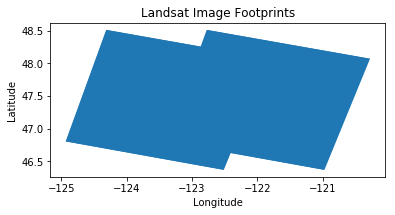

In [5]:
gf.plot()
plt.title('Landsat Image Footprints')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [6]:
# Pick one to look at
i = 2
path = gf.path.iloc[i]
row = gf.row.iloc[i]
id = gf.product_id.iloc[i]
date = gf.acquisitionDate.iloc[i]
index = gf.aws_index.iloc[i]
print('Acquisition over Seattle', date)
thumb = gf.aws_thumbnail.iloc[i]
downloads = gf.download_links.iloc[i] 
print(index)
print('Download from:', downloads.keys())
print('S3 files:')
print('\n'.join([os.path.basename(x) for x in downloads['aws_s3']]))

Acquisition over Seattle 2018-04-19
https://landsat-pds.s3.amazonaws.com/c1/L8/047/027/LC08_L1TP_047027_20180419_20180420_01_RT/index.html
Download from: dict_keys(['usgs', 'aws_s3', 'google'])
S3 files:
LC08_L1TP_047027_20180419_20180420_01_RT_ANG.txt
LC08_L1TP_047027_20180419_20180420_01_RT_B1.TIF
LC08_L1TP_047027_20180419_20180420_01_RT_B2.TIF
LC08_L1TP_047027_20180419_20180420_01_RT_B3.TIF
LC08_L1TP_047027_20180419_20180420_01_RT_B4.TIF
LC08_L1TP_047027_20180419_20180420_01_RT_B5.TIF
LC08_L1TP_047027_20180419_20180420_01_RT_B6.TIF
LC08_L1TP_047027_20180419_20180420_01_RT_B7.TIF
LC08_L1TP_047027_20180419_20180420_01_RT_B8.TIF
LC08_L1TP_047027_20180419_20180420_01_RT_B9.TIF
LC08_L1TP_047027_20180419_20180420_01_RT_B10.TIF
LC08_L1TP_047027_20180419_20180420_01_RT_B11.TIF
LC08_L1TP_047027_20180419_20180420_01_RT_BQA.TIF
LC08_L1TP_047027_20180419_20180420_01_RT_MTL.txt


https://landsat-pds.s3.amazonaws.com/c1/L8/047/027/LC08_L1TP_047027_20180419_20180420_01_RT/LC08_L1TP_047027_20180419_20180420_01_RT_thumb_small.jpg


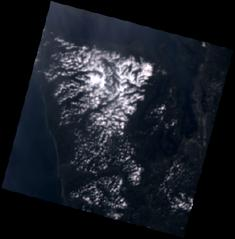

In [7]:
# Look at thumbnails
smallthumb = thumb.replace('large', 'small')
print(smallthumb)
Image(smallthumb)

# Rasterio and Cloud-Optimized Geotiffs

In [8]:
# Take a look at specific band metadata (band5=IR, band4=red):
#https://www.esri.com/arcgis-blog/products/product/imagery/band-combinations-for-landsat-8/
# As a GDAL command:
# gdalinfo /vsicurl/landsat-pds.s3.amazonaws.com/c1/L8/047/027/LC08_L1TP_047027_20180419_20180420_01_RT/LC08_L1TP_047027_20180419_20180420_01_RT_B5.TIF
# Cool aside: open this local pointer in QGIS:
# gdal_translate -of VRT /vsicurl/landsat-pds.s3.amazonaws.com/c1/L8/047/027/LC08_L1TP_047027_20180419_20180420_01_RT/LC08_L1TP_047027_20180419_20180420_01_RT_B5.TIF LC08_L1TP_047027_20180419_20180420_01_RT_B5.vrt
band=5
filepath = downloads['aws_s3'][band]
print(filepath)
with rasterio.open(filepath) as src:
    print(src.profile)

https://landsat-pds.s3.amazonaws.com/c1/L8/047/027/LC08_L1TP_047027_20180419_20180420_01_RT/LC08_L1TP_047027_20180419_20180420_01_RT_B5.TIF
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7861, 'height': 7971, 'count': 1, 'crs': CRS({'init': 'epsg:32610'}), 'transform': Affine(30.0, 0.0, 352185.0,
       0.0, -30.0, 5374215.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


Text(0,0.5,'Row #')

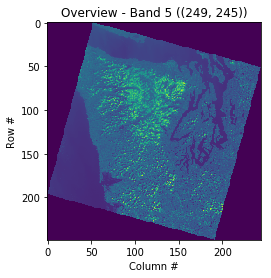

In [9]:
# Read a low resolution overview
# NOTE: at this point, only a subset of full image data is read into local memory
oview = 32 #16, 8, 4, 2
with rasterio.open(filepath) as src:
    thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))
    
plt.imshow(thumbnail)
plt.title('Overview - Band 5 ({})'.format(thumbnail.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0,0.5,'Row #')

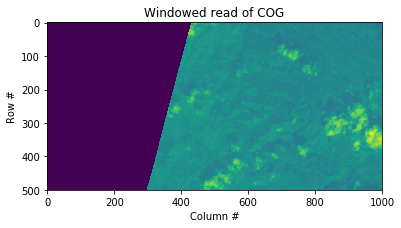

In [10]:
# REad only a 100x100 window of this 7861 by 7971 tile
#https://gis.stackexchange.com/questions/201831/how-to-efficiently-access-files-with-gdal-from-an-s3-bucket-using-vsis3
#https://mapbox.github.io/rasterio/topics/windowed-rw.html
with rasterio.open(filepath) as src:
    window = src.read(window=((1000, 1500), (1000, 2000)))[0]  #((row_start, row_stop), (col_start, col_stop))

plt.imshow(window)
plt.title('Windowed read of COG')
plt.xlabel('Column #')
plt.ylabel('Row #')

# Analyze image subset

In [11]:
# A more common use case is if you know a geographic window of interest (let's say just seattle)
# The Cloud-optimized geotiff shines in allowing you to download small subsets at full resolution
def get_window(S,N,W,E, src):
    ''' Get pixel coordinates from South, North, West, East bounds for windowed read'''
    ul_row, ul_col = src.index(W, N)
    lr_row, lr_col = src.index(E, S)
    col_off = ul_col
    row_off = ul_row
    width = lr_col - ul_col
    height = lr_row - ul_row
    window = rasterio.windows.Window(col_off, row_off, width, height)
    return window

In [12]:
# Now load that only region at full resolution!
# NOTE: probably a cleaner way to get bbox
W, S, E, N = (-122.46, 47.45, -122.07,  47.73)

# Careful! The data is in UTM (epsg:32610), need to reproject to use lat/lon
#https://rasterio.readthedocs.io/en/latest/topics/virtual-warping.html

with rasterio.open(filepath) as src:
    print('Orginal Profile:\n', src.profile)
    with WarpedVRT(src, dst_crs='epsg:4326', resampling=Resampling.bilinear) as vrt:
        print('Warped Profile:\n', vrt.profile)
        window = get_window(S,N,W,E, vrt)
        data = vrt.read(1, window=window)
        profile = vrt.profile.copy()
        profile.update({
            'height': window.height,
            'width': window.width,
            'transform': vrt.window_transform(window)})
        print('Windowed Profile:\n', profile)

Orginal Profile:
 {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7861, 'height': 7971, 'count': 1, 'crs': CRS({'init': 'epsg:32610'}), 'transform': Affine(30.0, 0.0, 352185.0,
       0.0, -30.0, 5374215.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}
Warped Profile:
 {'driver': 'VRT', 'dtype': 'uint16', 'nodata': None, 'width': 9396, 'height': 6379, 'count': 1, 'crs': 'epsg:4326', 'transform': Affine(0.00033981893621398403, 0.0, -125.00115799985802,
       0.0, -0.00033981893621398403, 48.52104589310843), 'blockxsize': 512, 'blockysize': 128, 'tiled': True}
Windowed Profile:
 {'driver': 'VRT', 'dtype': 'uint16', 'nodata': None, 'width': 1148, 'height': 824, 'count': 1, 'crs': 'epsg:4326', 'transform': Affine(0.00033981893621398403, 0.0, -122.46033181378607,
       0.0, -0.00033981893621398403, 47.73028722853849), 'blockxsize': 512, 'blockysize': 128, 'tiled': True}


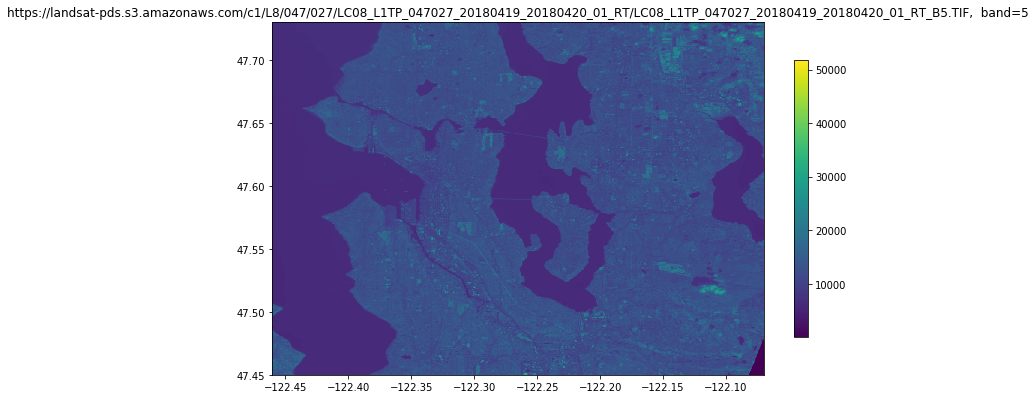

In [13]:
ul = profile['transform']*(0,0)
lr = profile['transform']*(profile['width'],profile['height'])
extent = (ul[0], lr[0], lr[1], ul[1])
plt.figure(figsize=(11,8.5))
plt.imshow(data, extent=extent)
cb = plt.colorbar(shrink=0.6)
plt.title(f'{filepath},  band={band}')
plt.savefig('subset-band5.png') # Save only the figure!

# Save your subset locally

In [14]:
# Save locally
profile['driver'] = 'GTiff'
print(profile) 
localname = os.path.basename(filepath)
with rasterio.open(localname, 'w', **profile) as dst:
    dst.write_band(1, data)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1148, 'height': 824, 'count': 1, 'crs': 'epsg:4326', 'transform': Affine(0.00033981893621398403, 0.0, -122.46033181378607,
       0.0, -0.00033981893621398403, 47.73028722853849), 'blockxsize': 512, 'blockysize': 128, 'tiled': True}


Text(0.5,1,'https://landsat-pds.s3.amazonaws.com/c1/L8/047/027/LC08_L1TP_047027_20180419_20180420_01_RT/LC08_L1TP_047027_20180419_20180420_01_RT_B5.TIF,  band=5')

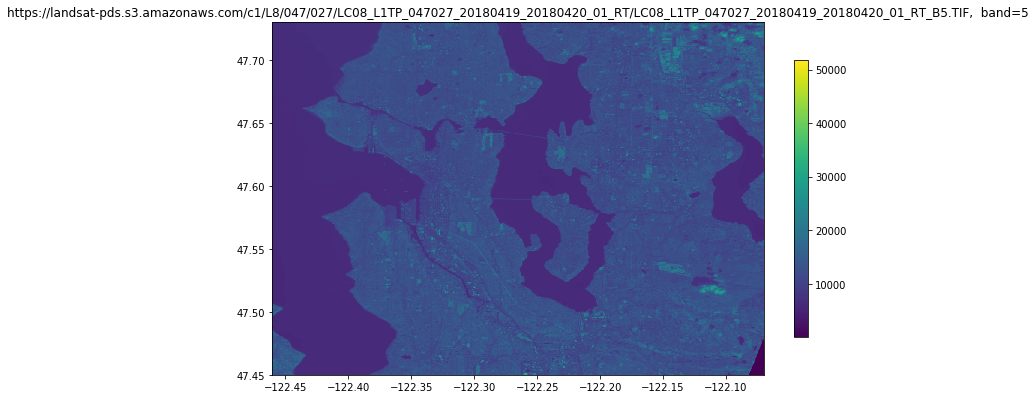

In [15]:
# Re-open the local file to see that it matches!
with rasterio.open(localname) as src:
    profile = src.profile
    data = src.read()[0]

ul = profile['transform']*(0,0)
lr = profile['transform']*(profile['width'],profile['height'])
extent = (ul[0], lr[0], lr[1], ul[1])
plt.figure(figsize=(11,8.5))
plt.imshow(data, extent=extent)
cb = plt.colorbar(shrink=0.6)
plt.title(f'{filepath},  band={band}')

# Save multiband subset

In [16]:
def load_band(filepath, S, N, W, E):
    with rasterio.open(filepath) as src:
    #print('Orginal Profile:\n', src.profile)
        with WarpedVRT(src, dst_crs='epsg:4326', resampling=Resampling.bilinear) as vrt:
            #print('Warped Profile:\n', vrt.profile)
            window = get_window(S,N,W,E, vrt)
            data = vrt.read(1, window=window)
            profile = vrt.profile.copy()
            profile.update({
                'height': window.height,
                'width': window.width,
                'transform': vrt.window_transform(window)})
            #print('Windowed Profile:\n', profile)
    return data, profile

In [17]:
# NOTE: this will save multiband subset as geotiff to local disk
# NOTE: this will be slow with a slow internet connection, but is super fast if running on AWS EC2 us-west-2

W, S, E, N = (-122.46, 47.45, -122.07,  47.73)
band, profile = load_band(downloads['aws_s3'][1], S,N,W,E)

profile['driver'] = 'GTiff'
print('profile for multiband file:\n', profile)
with rasterio.open('multiband.tif', 'w', **profile) as dst:
    for band in range(1,12):
        print('retrieving band {}'.format(band))
        band, profile = load_band(downloads['aws_s3'][band], S,N,W,E)
        dst.write_band(1, data)

profile for multiband file:
 {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1148, 'height': 824, 'count': 1, 'crs': 'epsg:4326', 'transform': Affine(0.00033981893621398403, 0.0, -122.46033181378607,
       0.0, -0.00033981893621398403, 47.73028722853849), 'blockxsize': 512, 'blockysize': 128, 'tiled': True}
retrieving band 1
retrieving band 2
retrieving band 3
retrieving band 4
retrieving band 5
retrieving band 6
retrieving band 7
retrieving band 8
retrieving band 9
retrieving band 10
retrieving band 11


# NDVI Analysis

In [ ]:
# Do some analysis on image subset (NDVI)
# Now load that only region at full resolution!
# NOTE: probably a cleaner way to get bbox
W, S, E, N = (-122.46, 47.45, -122.07,  47.73)
band5, profile = load_band(downloads['aws_s3'][5], S,N,W,E)
band4, profile = load_band(downloads['aws_s3'][4], S,N,W,E)

#ground cover containing a dense vegetation canopy will tend to positive values
ndvi = (band5 - band4) / (band5 + band4)

In [ ]:
ndvi[ndvi>1]=np.nan # Cheap water mask
ul = profile['transform']*(0,0)
lr = profile['transform']*(profile['width'],profile['height'])
extent = (ul[0], lr[0], lr[1], ul[1])
plt.figure(figsize=(11,8.5))
plt.imshow(ndvi, extent=extent, vmin=0, vmax=1)
cb = plt.colorbar(shrink=0.6)
cb.set_label('NDVI')
plt.title(os.path.basename(filepath));

## Conclusions

* We demonstrated how to query the public landsat-8 dataset on AWS using the sat-utils library
* We used the **rasterio** library to access subsets of landsat-8 cloud-optimized geotiffs
* We showed how to download only subsets of data or images to our local disk (Mb instead of Gb)!